In [1]:
import torchvision

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False)

Files already downloaded and verified


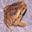

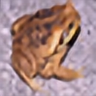

In [23]:
import argparse
import torch
from torch.autograd import Variable
from PIL import Image
from torchvision.transforms import ToTensor

import numpy as np

from IPython.display import display

input_image = trainset.train_data[355]
model = 'model_epoch_100.pth'
cuda = True

orig_img = Image.fromarray(input_image)
img = orig_img.convert('YCbCr')
y, cb, cr = img.split()

model = torch.load(model)
input = Variable(ToTensor()(y)).view(1, -1, y.size[1], y.size[0])

if cuda:
    model = model.cuda()
    input = input.cuda()

out = model(input)
out = out.cpu()
out_img_y = out.data[0].numpy()
out_img_y *= 255.0
out_img_y = out_img_y.clip(0, 255)
out_img_y = Image.fromarray(np.uint8(out_img_y[0]), mode='L')

out_img_cb = cb.resize(out_img_y.size, Image.BICUBIC)
out_img_cr = cr.resize(out_img_y.size, Image.BICUBIC)
out_img = Image.merge('YCbCr', [out_img_y, out_img_cb, out_img_cr]).convert('RGB')

display(orig_img)
display(out_img)

#out_img.save(opt.output_filename)
#print('output image saved to ', opt.output_filename)